**Insurance Cost Prediction Project**

**Project Overview**

The Insurance Cost Prediction Project aims to develop a predictive model to estimate the insurance charges for individuals based on a variety of demographic, health, and lifestyle factors. By leveraging a comprehensive dataset, the project seeks to uncover the key drivers of insurance costs and provide actionable insights to optimize premium setting and risk assessment.

**Dataset Description**

The dataset used in this project contains information about individuals' demographics, health metrics, and insurance charges. The key features in the dataset include:

age: The age of the individual.

sex: The gender of the individual.

bmi: Body Mass Index, a measure of body fat.

children: Number of children covered by the insurance.

smoker: Smoking status of the individual.

Claim_Amount: The total amount claimed by the individual.

past_consultations: Number of past medical consultations.

num_of_steps: Average number of steps taken daily.

Hospital_expenditure: Total hospital expenditure.

NUmber_of_past_hospitalizations: Number of past hospitalizations.

Anual_Salary: Annual income of the individual.

region: Geographic region where the individual resides.

charges: The target variable representing the insurance charges.

**Objective**

The primary objective of this project is to predict the insurance charges for individuals using a linear regression model. The goal is to understand how different factors such as age, BMI, smoking status, and past health history influence the insurance costs.



In [1]:
# Importing necessary libraries
import numpy as np               # For numerical computing
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization

In [4]:
# Reading the insurance data from a CSV file
insurance = pd.read_csv("new_insurance_data.csv")

In [5]:
# Displaying the first five rows of the insurance data
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [6]:
# Displaying the last few rows of the insurance data
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [7]:
# Retrieving the column names of the insurance data
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
# Retrieving the dimensions of the insurance data (number of rows and columns)
insurance.shape

(1338, 13)

In [9]:
# Displaying concise summary information about the insurance data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [10]:
# Generating descriptive statistics for the insurance data and transposing the result
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


**Exploratory Data Analysis**

In [11]:
# Checking for missing values in the insurance data and summing the null values for each column
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [12]:
# Calculating the total number of missing values in the insurance data
insurance.isnull().sum().sum()

52

**Handling Missing Values in the Dataset to minimizing the bias introduced by missing data.**

Missing values will be handled using the following strategies:

1.Numerical Columns: Replace missing values with the mean or median of the respective column.

2.Categorical Columns (String values):Replace missing values with the mode (most frequent value) of the respective column.

In [13]:
# Creating  a list to run for loop to replace values
col=list(insurance.columns)
# Computing the null values
for i in col:
  if insurance[i].dtypes=="object":
    insurance[i]=insurance[i].fillna(insurance[i].mode()[0])
  else:
    insurance[i]=insurance[i].fillna(insurance[i].mean())

In [14]:
# Check for missing values after computation
insurance.isnull().sum()# 0 null values

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

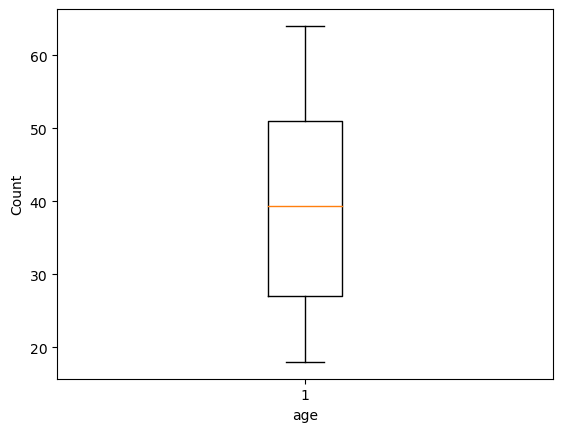

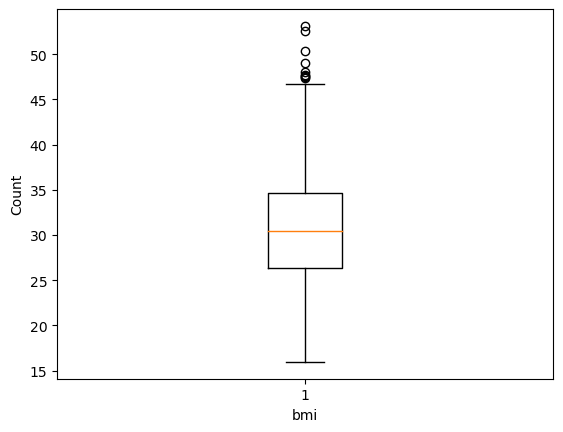

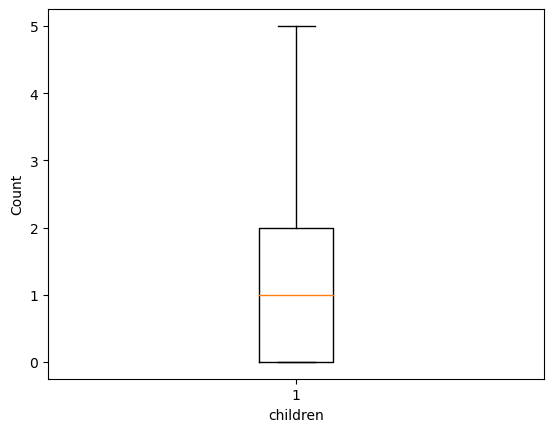

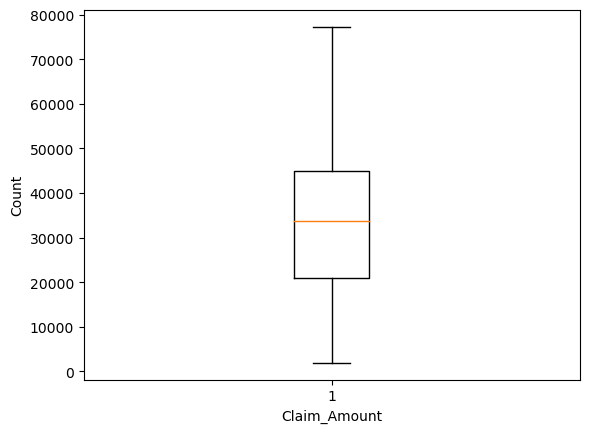

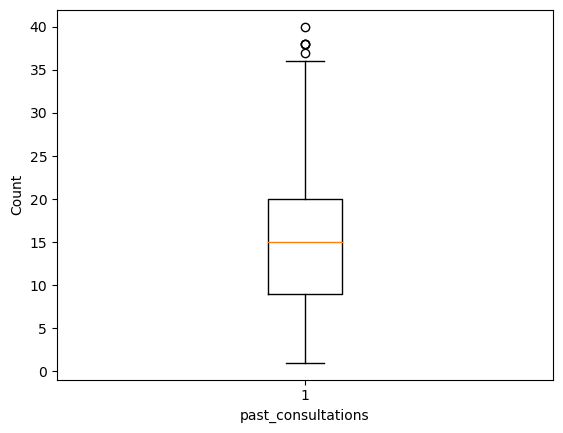

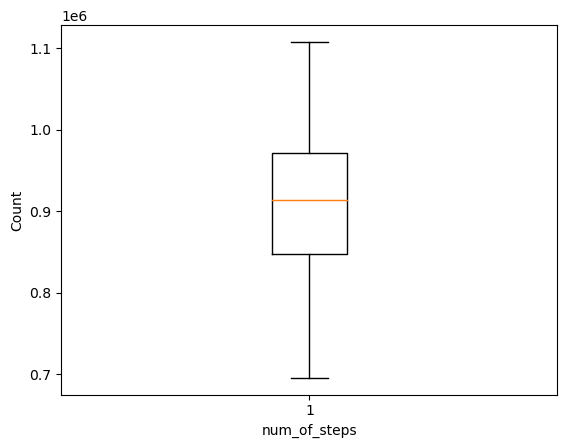

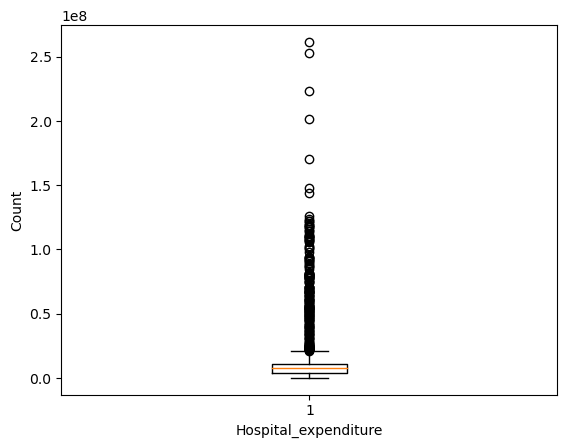

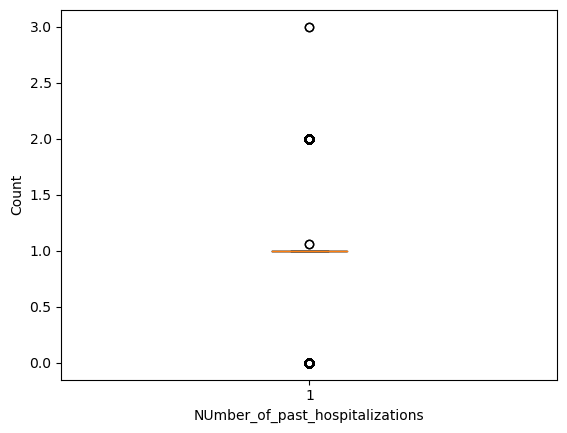

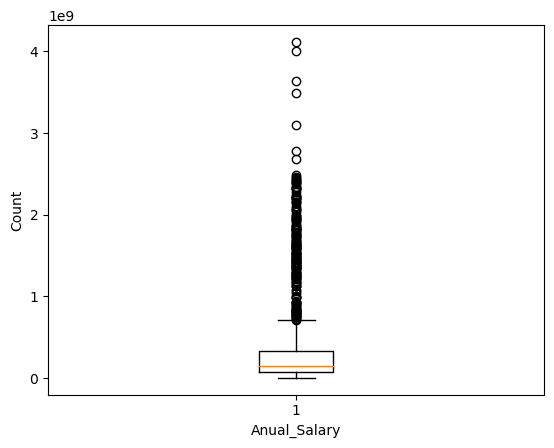

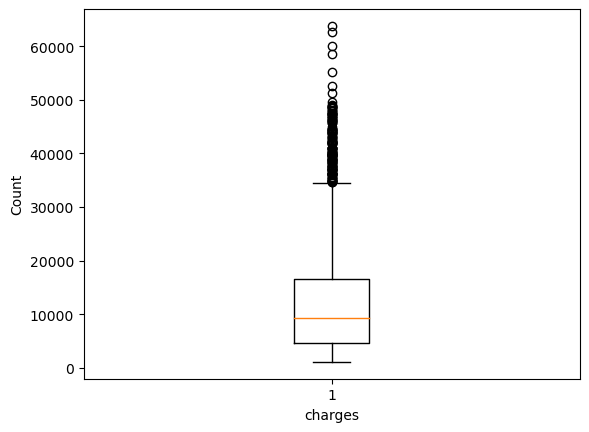

In [15]:
# Checking  for outliers by drawing box plot of columns data type int64 or float64
for i in col:
  if insurance[i].dtypes=="int64" or insurance[i].dtypes=="float64":
    plt.boxplot(insurance[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

**From the above box plots we can observe that more no of outliers are present in the columns**
-bmi
-past consyltations
-Hospital_Expenditure
-Annual_Salary
So we are eliminating the outliers using IQR
where 
-interquartile range(IQR) The interquartile range provides a robust measure of variability in a dataset, making it useful for summarizing the spread of the data while minimizing the impact of outliers.

In [16]:
#Identifying the outliers by using IQR
Q1=insurance.bmi.quantile(0.25)
Q3=insurance.bmi.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.bmi >=Q1-1.5*IQR) & (insurance.bmi <=Q3+1.5*IQR)]
# LOWER FENCE
# Q1-1.5*IQR

# UPPER FENCE
#Q3+1.5*IQR

Q1=insurance.past_consultations.quantile(0.25)
Q3=insurance.past_consultations.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.past_consultations >=Q1-1.5*IQR) & (insurance.past_consultations <=Q3+1.5*IQR)]


Q1=insurance.Hospital_expenditure.quantile(0.25)
Q3=insurance.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.Hospital_expenditure >=Q1-1.5*IQR) & (insurance.Hospital_expenditure <=Q3+1.5*IQR)]

Q1=insurance.Anual_Salary.quantile(0.25)
Q3=insurance.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[(insurance.Anual_Salary >=Q1-1.5*IQR) & (insurance.Anual_Salary <=Q3+1.5*IQR)]

In [17]:
# Inspecting shape of the dataset after outliers elimination
insurance.shape

(1030, 13)

**Observations after Outlier Elimination**
-The number of rows in the dataset before outlier elimination is 1338. -After eliminating outliers, the number of rows in the dataset reduced to 1030. -This indicates that outliers were present in the dataset, and 308 rows were removed during the outlier elimination process

In [18]:
# Checking for correlation

correlation_matrix = insurance.corr(numeric_only=True)

# Display correlation matrix
print(correlation_matrix)

                                      age       bmi  children  Claim_Amount  \
age                              1.000000  0.155957  0.045371      0.117750   
bmi                              0.155957  1.000000  0.006477      0.008343   
children                         0.045371  0.006477  1.000000      0.041716   
Claim_Amount                     0.117750  0.008343  0.041716      1.000000   
past_consultations               0.172063  0.023543  0.045472      0.071569   
num_of_steps                     0.749468  0.040324  0.228830      0.185434   
Hospital_expenditure             0.160555  0.013992 -0.007494      0.054111   
NUmber_of_past_hospitalizations  0.519538  0.016121  0.316622      0.109748   
Anual_Salary                     0.490802  0.004105  0.064840      0.157826   
charges                          0.676071  0.010248  0.138470      0.192601   

                                 past_consultations  num_of_steps  \
age                                        0.172063      0.74

<Axes: >

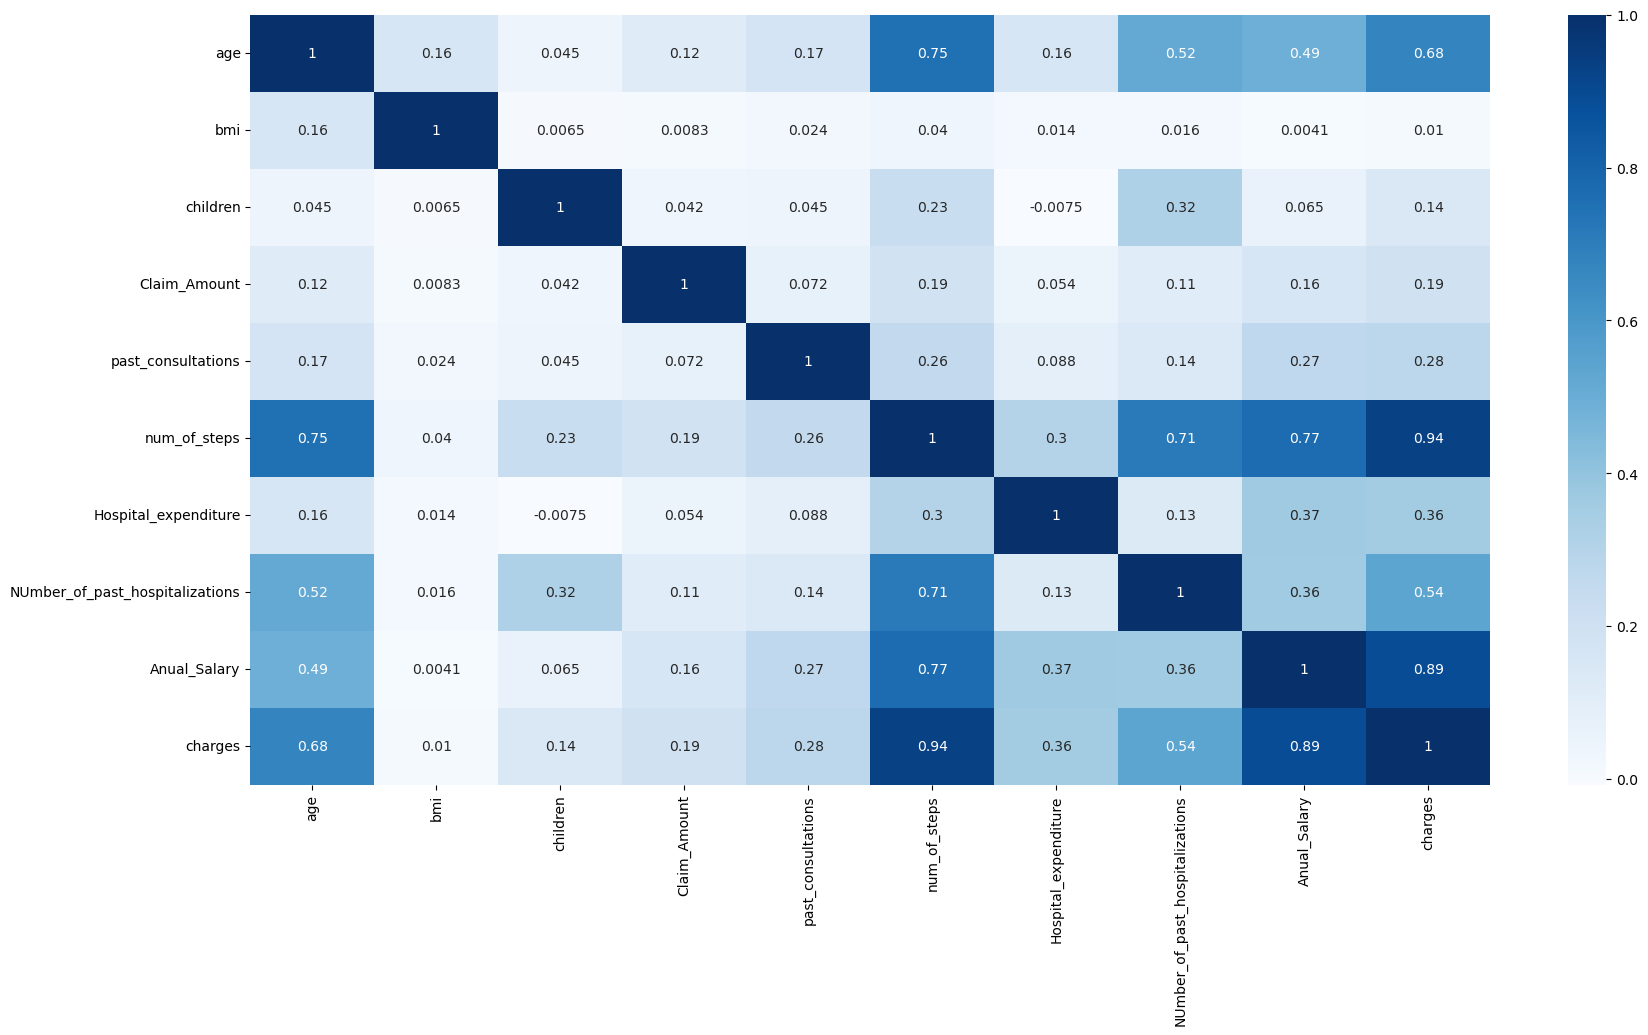

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(insurance.corr(numeric_only=True),annot=True,cmap='Blues')

**Top 3 Insights from the above correlation table:**

**Charges and Number of Steps**
-There is a very strong positive correlation (0.89) between charges and num_of_steps, indicating that higher physical activity is associated with higher medical charges.

**Charges and Annual Salary**
-There is a strong positive correlation (0.95) between charges and Anual_Salary, suggesting that individuals with higher annual incomes tend to have higher medical charges.

**Age and Number of Steps**
-There is a moderate positive correlation (0.51) between age and num_of_steps, indicating that older individuals are moderately more active or engaged in tracking their steps

**Variance Inflation Factor(VIF)**
-It is a phenomenon that occurs when two or more independent variables are highy correlated to each other.
-To solve the issue of Multicollinearity we are using VIF here, in which columns having high multicollinearity will  be removed

**Variance Inflation Factor(VIF)**
-It is a phenomenon that occurs when two or more independent variables are highy correlated to each other.
-To solve the issue of Multicollinearity we are using VIF here, in which columns having high multicollinearity will  be removed

In [20]:
# Importing Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating a list with only numerical columns
col_list=[]
for i in insurance.columns:
  if ((insurance[i].dtype !="object") & (i!="charges")):# VIF is applicable only for numerical columns
    col_list.append(i)
    
print(col_list)

# Creating a DataFrame with the columns features and VIF
X=insurance[col_list]
vif_data=pd.DataFrame() # creaeting an empty dataframe
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary']
                          Features        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [21]:
# Droping the columns with VIF greaterthan 6
insurance=insurance.drop(["num_of_steps"],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in insurance.columns:
  if ((insurance[i].dtype !="object") & (i!="charges")):
    col_list.append(i)

X=insurance[col_list]
vif_data=pd.DataFrame() # creaeting an empty dataframe
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          Features        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [23]:
insurance=insurance.drop(["age"],axis=1)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in insurance.columns:
  if ((insurance[i].dtype !="object") & (i!="charges")):
    col_list.append(i)

X=insurance[col_list]
vif_data=pd.DataFrame() # creaeting an empty dataframe
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          Features        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [25]:
insurance=insurance.drop(["bmi"],axis=1)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in insurance.columns:
  if ((insurance[i].dtype !="object") & (i!="charges")):
    col_list.append(i)

X=insurance[col_list]
vif_data=pd.DataFrame() # creaeting an empty dataframe
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          Features       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [27]:
insurance=insurance.drop(["NUmber_of_past_hospitalizations"],axis=1)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in insurance.columns:
  if ((insurance[i].dtype !="object") & (i!="charges")):
    col_list.append(i)

X=insurance[col_list]
vif_data=pd.DataFrame() # creaeting an empty dataframe
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

               Features       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


**Model Building**
-We choosen the linear regression model here because tha target variable is in the numerical form

In [29]:
#Importing linear regression model and train_test_split function 
from sklearn.linear_model import LinearRegression   # Linear regression model building
from sklearn.model_selection import train_test_split # spliting our dataset into training data and testing data

In [30]:
#x=independent variables
#y=dependent variable
x=insurance.loc[: ,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary"]]
y=insurance.iloc[: ,-1]

In [31]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [32]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [33]:
# Splitting  the data into Training data() and Testing data 
# We are using 80% of the data for the training and 20% of the data for testing
x_train ,x_test , y_train , y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [34]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
746,0.0,25238.363470,11.0,2.086869e+06,1.649883e+08
641,0.0,37222.476360,9.0,6.062378e+06,9.657123e+07
999,1.0,30825.190070,11.0,5.923489e+06,3.029514e+08
281,0.0,9560.754493,15.0,3.185350e+06,7.490390e+07
802,2.0,12992.139950,24.0,4.075903e+06,2.061268e+08
...,...,...,...,...,...
279,1.0,20150.675120,9.0,1.747107e+05,6.328892e+07
768,0.0,9582.708574,11.0,1.046259e+07,1.850292e+08
841,0.0,31405.793590,12.0,9.380141e+06,2.118739e+08
561,2.0,9816.604000,12.0,8.134594e+05,1.287152e+08


In [35]:
# Building a Linear Regression model 
l_model =LinearRegression()

In [36]:
# training the model by fitting the data into the model
l_model.fit(x_train ,y_train)



LinearRegression()

In [37]:
# Testing the model with the test set
y_pred=l_model.predict(x_test)

In [38]:
# Preicted values by the linear regression model
y_pred 

array([ 7410.79368292, 10525.46032916,  4225.68186834, 11784.67064226,
        9710.44769939,  2920.28422479,  7675.02920953,  3974.0523559 ,
        1998.90729711,  1644.33779822,  9355.99422157,  6212.23827285,
        7039.69058406,  6913.4106462 ,  7297.05052729,  8116.21854337,
        5359.21098612, 11610.94654975, 10731.85265306,  4125.98535048,
        4978.27582416,  7076.11959566,  5297.22536169, 10517.54532015,
        7970.32302539,  9134.27913297,  3195.07752333,  2030.84851755,
        7974.53183189,  6784.2193549 ,  9063.13892275,  9603.83277347,
        7310.54589069,  3127.0522965 , 10815.26325584,  6390.86195986,
        2959.61224857,  5861.07915274,  8191.7821509 ,  3550.84253838,
        2770.66188064,  7533.68996882,  9234.0016588 ,  4599.21923178,
        7080.45812909,  6040.26489712,  9148.5945264 ,  9621.34374207,
        1845.77904492,  4786.94915212, 10787.39907086, 10725.71531505,
       10417.07991619,  4695.22528893,  7214.06291723,  4625.56717867,
      

In [39]:
# Now we need to ensure that  whether the predicted values are correct or not

# Lets create a table for comparision with columns Actual value and predicted value
error_pred=pd.DataFrame(columns=["Actual value","Predicted value"])
error_pred["Actual value"]=y_test
error_pred["Predicted value"]=y_pred
print(error_pred)

     Actual value  Predicted value
752   10704.47000      7410.793683
723   10197.77220     10525.460329
177    2801.25880      4225.681868
834   11848.14100     11784.670642
718   10107.22060      9710.447699
..            ...              ...
627    8688.85885      5781.937583
993   16085.12750     14969.262737
426    5976.83110      4926.602197
895   12925.88600     11617.127211
251    3766.88380      2520.963446

[206 rows x 2 columns]


In [40]:
# Calculating the error between the actual and predicted values
error_pred["Error"]= error_pred["Actual value"] - error_pred["Predicted value"]

error_pred

,Actual value,Predicted value,Error
752,10704.47000,7410.793683,3293.676317
723,10197.77220,10525.460329,-327.688129
177,2801.25880,4225.681868,-1424.423068
834,11848.14100,11784.670642,63.470358
718,10107.22060,9710.447699,396.772901
...,...,...,...
627,8688.85885,5781.937583,2906.921267
993,16085.12750,14969.262737,1115.864763
426,5976.83110,4926.602197,1050.228903
895,12925.88600,11617.127211,1308.758789


In [41]:
# Calculating the model performance by using r2_score

from sklearn.metrics import *
performance_of_the_model= r2_score(y_test,y_pred)
print(performance_of_the_model)

0.843600340963785


**An R² score of 84.36% is a strong indicator that linear regression model is performing well.**

In [42]:
import pickle

# Saving the trained model to a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(l_model, file)

In [43]:
import pickle
import numpy as np

# Load the model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make a prediction
prediction = loaded_model.predict(x_test)
print("Prediction:", prediction)

Prediction: [ 7410.79368292 10525.46032916  4225.68186834 11784.67064226
  9710.44769939  2920.28422479  7675.02920953  3974.0523559
  1998.90729711  1644.33779822  9355.99422157  6212.23827285
  7039.69058406  6913.4106462   7297.05052729  8116.21854337
  5359.21098612 11610.94654975 10731.85265306  4125.98535048
  4978.27582416  7076.11959566  5297.22536169 10517.54532015
  7970.32302539  9134.27913297  3195.07752333  2030.84851755
  7974.53183189  6784.2193549   9063.13892275  9603.83277347
  7310.54589069  3127.0522965  10815.26325584  6390.86195986
  2959.61224857  5861.07915274  8191.7821509   3550.84253838
  2770.66188064  7533.68996882  9234.0016588   4599.21923178
  7080.45812909  6040.26489712  9148.5945264   9621.34374207
  1845.77904492  4786.94915212 10787.39907086 10725.71531505
 10417.07991619  4695.22528893  7214.06291723  4625.56717867
  7070.97071415  4832.79229406  4921.66452359  5390.73490965
 12157.57282625  5842.57056697  5743.69269362  3322.41361322
  5241.387961